Another available inference method is the k nearest neighbors (KNN) version of oCSE. This takes a tremendous amount of data to converge however and a long time to run, so don't count on this method accurately finding reasonably dense network structures... You can also generate logistic dynamics over the network as shown in the paper "Causation Entropy Identifies Indirect Influences, Dominance of Neighbors and Anticipatory Couplings" by Jie Sun and Erik Bollt. Example code:

In [ ]:
from causationentropy.datasets.synthetic import logisic_dynamics
from causationentropy.core.discovery import discover_network

data = logisic_dynamics(n=10)
G = discover_network(data)

/tmp/ipykernel_2338199/1797385284.py:82: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x, y), 0.08, color=node_colors[i % len(node_colors)],
/tmp/ipykernel_2338199/1797385284.py:181: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


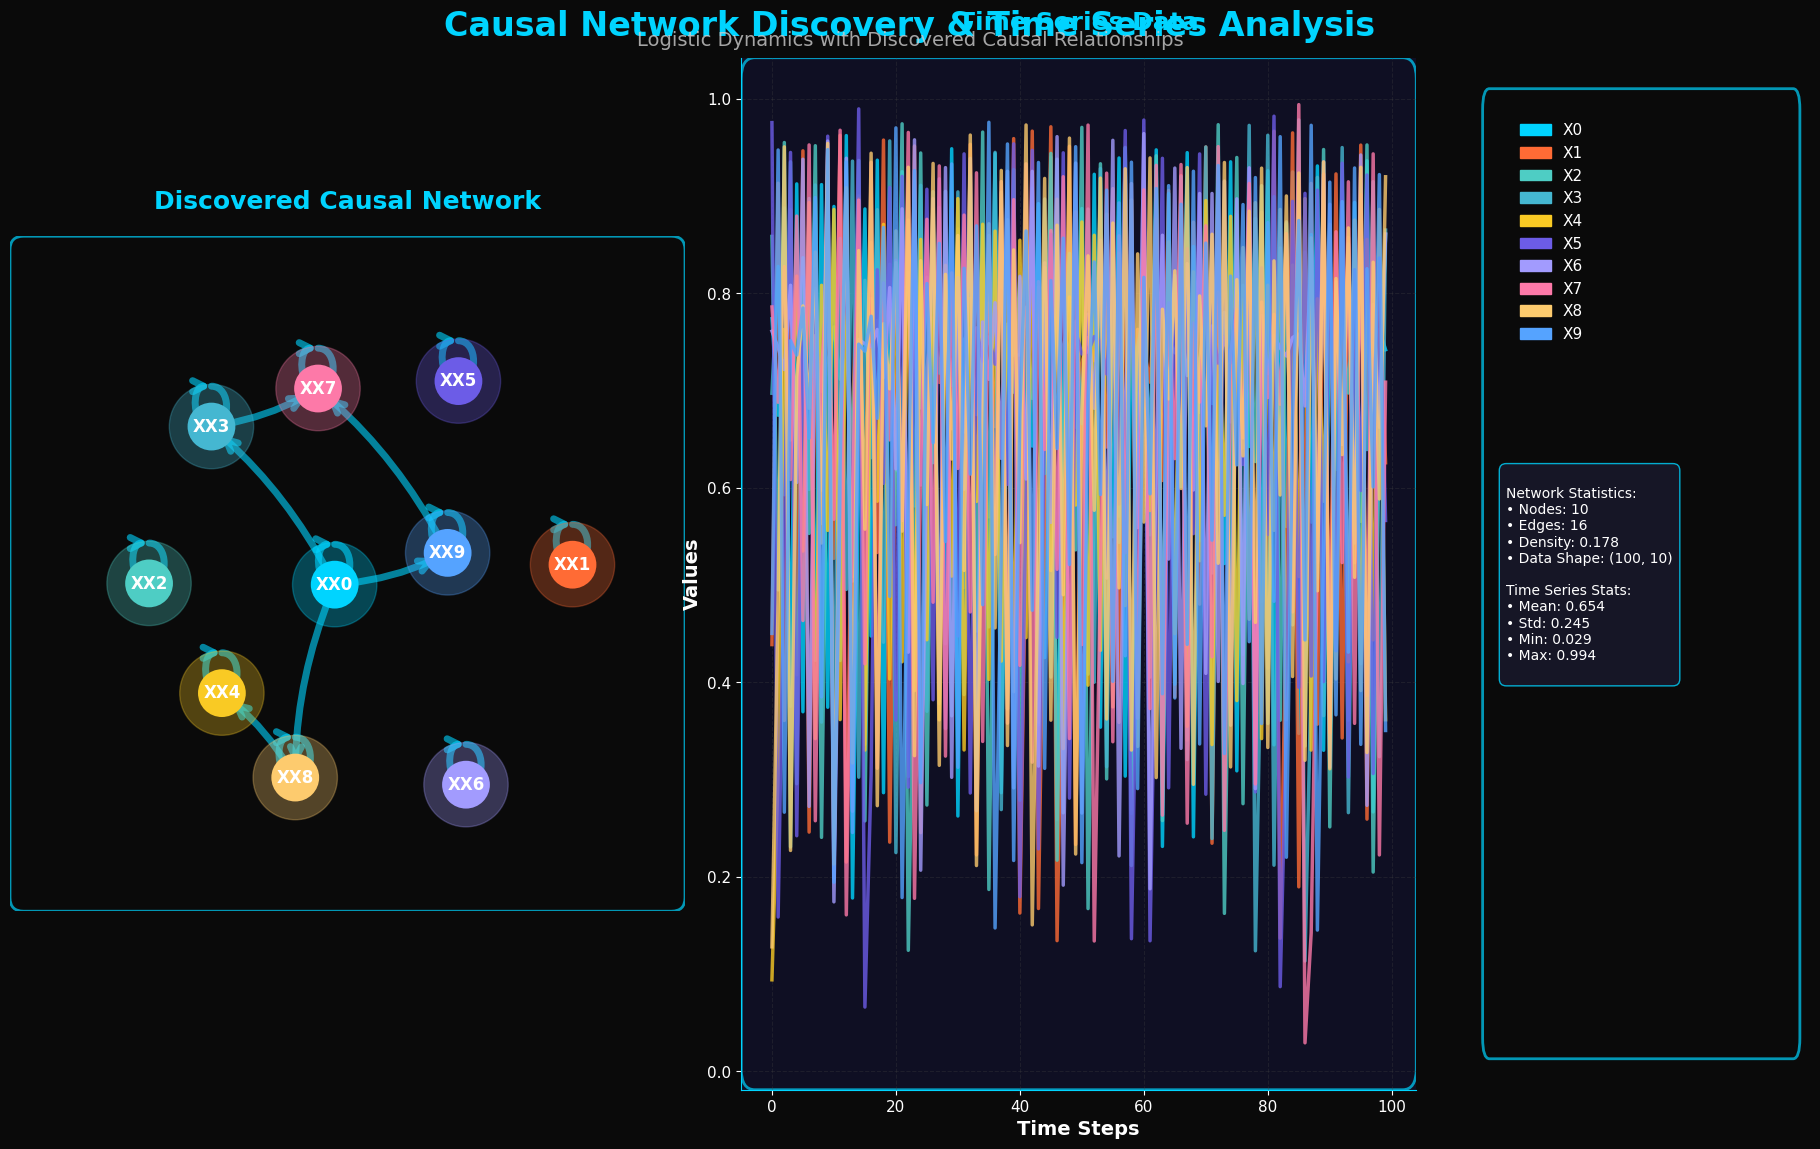

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec

# Set style for beautiful plots
plt.style.use('dark_background')
sns.set_palette("husl")

def create_causal_network_plot(data, G, figsize=(20, 12)):
    """
    Create a stunning visualization combining causal network and time series
    
    Parameters:
    data: numpy array of shape (100, 10) - your time series data
    G: networkx graph - your discovered causal network
    figsize: tuple - figure size
    """
    
    # Create figure with custom layout
    fig = plt.figure(figsize=figsize, facecolor='#0a0a0a')
    
    # Create custom grid layout
    gs = GridSpec(2, 3, figure=fig, height_ratios=[1, 1], width_ratios=[1.2, 1.2, 0.6],
                  hspace=0.15, wspace=0.1, left=0.05, right=0.95, top=0.93, bottom=0.07)
    
    # Define color palette
    colors = sns.color_palette("husl", 10)
    node_colors = ['#00d4ff', '#ff6b35', '#4ecdc4', '#45b7d1', '#f9ca24',
                   '#6c5ce7', '#a29bfe', '#fd79a8', '#fdcb6e', '#55a3ff']
    
    # ============ NETWORK PLOT ============
    ax_network = fig.add_subplot(gs[:, 0])
    ax_network.set_facecolor('#0f0f23')
    
    # Add fancy border
    fancy_box = FancyBboxPatch((0.02, 0.02), 0.96, 0.96, boxstyle="round,pad=0.02",
                               facecolor='none', edgecolor='#00d4ff', linewidth=2,
                               alpha=0.7, transform=ax_network.transAxes)
    ax_network.add_patch(fancy_box)
    
    # Network layout - try different layouts for best visualization
    pos = None
    if len(G.nodes()) > 0:
        # Try circular layout first, then spring if it looks better
        pos_circular = nx.circular_layout(G, scale=0.8)
        pos_spring = nx.spring_layout(G, k=1, iterations=50, scale=0.8)
        
        # Use spring layout as it usually looks better for causal networks
        pos = pos_spring
    else:
        # Create dummy positions if no edges
        pos = {i: (np.cos(2*np.pi*i/10), np.sin(2*np.pi*i/10)) for i in range(10)}
    
    # Draw edges with varying thickness and transparency
    if G.edges():
        edges = G.edges()
        edge_weights = []
        
        # Get edge weights if they exist
        for edge in edges:
            weight = G[edge[0]][edge[1]].get('weight', 0.5)
            edge_weights.append(weight * 8 + 1)  # Scale for visibility
        
        # Draw edges
        nx.draw_networkx_edges(G, pos, ax=ax_network,
                              edge_color='#00d4ff', width=edge_weights,
                              alpha=0.6, arrows=True, arrowsize=20,
                              arrowstyle='->', connectionstyle='arc3,rad=0.1')
    
    # Draw nodes with beautiful styling
    for i, (node, (x, y)) in enumerate(pos.items()):
        # Outer glow effect
        circle_glow = plt.Circle((x, y), 0.15, color=node_colors[i % len(node_colors)], 
                                alpha=0.3, zorder=1)
        ax_network.add_patch(circle_glow)
        
        # Main node
        circle = plt.Circle((x, y), 0.08, color=node_colors[i % len(node_colors)], 
                           edgecolor='white', linewidth=2, zorder=2)
        ax_network.add_patch(circle)
        
        # Node label
        ax_network.text(x, y, f'X{node}', ha='center', va='center', 
                       fontsize=12, fontweight='bold', color='white', zorder=3)
    
    ax_network.set_xlim(-1.2, 1.2)
    ax_network.set_ylim(-1.2, 1.2)
    ax_network.set_aspect('equal')
    ax_network.axis('off')
    ax_network.set_title('Discovered Causal Network', fontsize=18, fontweight='bold',
                        color='#00d4ff', pad=20)
    
    # ============ TIME SERIES PLOT ============
    ax_ts = fig.add_subplot(gs[:, 1])
    ax_ts.set_facecolor('#0f0f23')
    
    # Add fancy border
    fancy_box_ts = FancyBboxPatch((0.02, 0.02), 0.96, 0.96, boxstyle="round,pad=0.02",
                                  facecolor='none', edgecolor='#00d4ff', linewidth=2,
                                  alpha=0.7, transform=ax_ts.transAxes)
    ax_ts.add_patch(fancy_box_ts)
    
    # Plot time series with beautiful styling
    time_steps = np.arange(data.shape[0])
    
    for i in range(data.shape[1]):
        ax_ts.plot(time_steps, data[:, i], color=node_colors[i], 
                  linewidth=2.5, alpha=0.8, label=f'X{i}')
    
    # Styling for time series
    ax_ts.set_xlabel('Time Steps', fontsize=14, color='white', fontweight='bold')
    ax_ts.set_ylabel('Values', fontsize=14, color='white', fontweight='bold')
    ax_ts.set_title('Time Series Data', fontsize=18, fontweight='bold', 
                   color='#00d4ff', pad=20)
    
    # Grid styling
    ax_ts.grid(True, alpha=0.3, color='#444444', linestyle='--')
    ax_ts.spines['bottom'].set_color('#00d4ff')
    ax_ts.spines['left'].set_color('#00d4ff')
    ax_ts.spines['top'].set_visible(False)
    ax_ts.spines['right'].set_visible(False)
    ax_ts.tick_params(colors='white', labelsize=11)
    
    # ============ LEGEND AND STATS ============
    ax_legend = fig.add_subplot(gs[:, 2])
    ax_legend.set_facecolor('#0f0f23')
    ax_legend.axis('off')
    
    # Add fancy border
    fancy_box_legend = FancyBboxPatch((0.05, 0.05), 0.9, 0.9, boxstyle="round,pad=0.02",
                                     facecolor='none', edgecolor='#00d4ff', linewidth=2,
                                     alpha=0.7, transform=ax_legend.transAxes)
    ax_legend.add_patch(fancy_box_legend)
    
    # Create custom legend
    legend_elements = [mpatches.Patch(color=node_colors[i], label=f'X{i}') 
                      for i in range(10)]
    
    legend = ax_legend.legend(handles=legend_elements, loc='upper left', 
                             frameon=False, fontsize=11, 
                             bbox_to_anchor=(0.1, 0.95))
    for text in legend.get_texts():
        text.set_color('white')
    
    # Add network statistics
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    density = nx.density(G) if num_nodes > 1 else 0
    
    stats_text = f"""
Network Statistics:
• Nodes: {num_nodes}
• Edges: {num_edges}  
• Density: {density:.3f}
• Data Shape: {data.shape}

Time Series Stats:
• Mean: {np.mean(data):.3f}
• Std: {np.std(data):.3f}
• Min: {np.min(data):.3f}
• Max: {np.max(data):.3f}
    """
    
    ax_legend.text(0.1, 0.6, stats_text, transform=ax_legend.transAxes, 
                  fontsize=10, color='white', verticalalignment='top',
                  bbox=dict(boxstyle="round,pad=0.5", facecolor='#1a1a2e', 
                           edgecolor='#00d4ff', alpha=0.8))
    
    # Add main title
    fig.suptitle('Causal Network Discovery & Time Series Analysis', 
                fontsize=24, fontweight='bold', color='#00d4ff', y=0.97)
    
    # Add subtle subtitle
    fig.text(0.5, 0.94, 'Logistic Dynamics with Discovered Causal Relationships', 
             ha='center', fontsize=14, color='#cccccc', alpha=0.8)
    
    plt.tight_layout()
    return fig

# Usage with your data:
# Assuming you have your data and G from the code you provided
fig = create_causal_network_plot(data, G)
plt.show()

# Optional: Save the plot
# plt.savefig('causal_network_analysis.png', dpi=300, bbox_inches='tight', 
#             facecolor='#0a0a0a', edgecolor='none')

/tmp/ipykernel_2338199/3542611969.py:72: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((x, y), 0.06, color=node_colors[i % len(node_colors)],


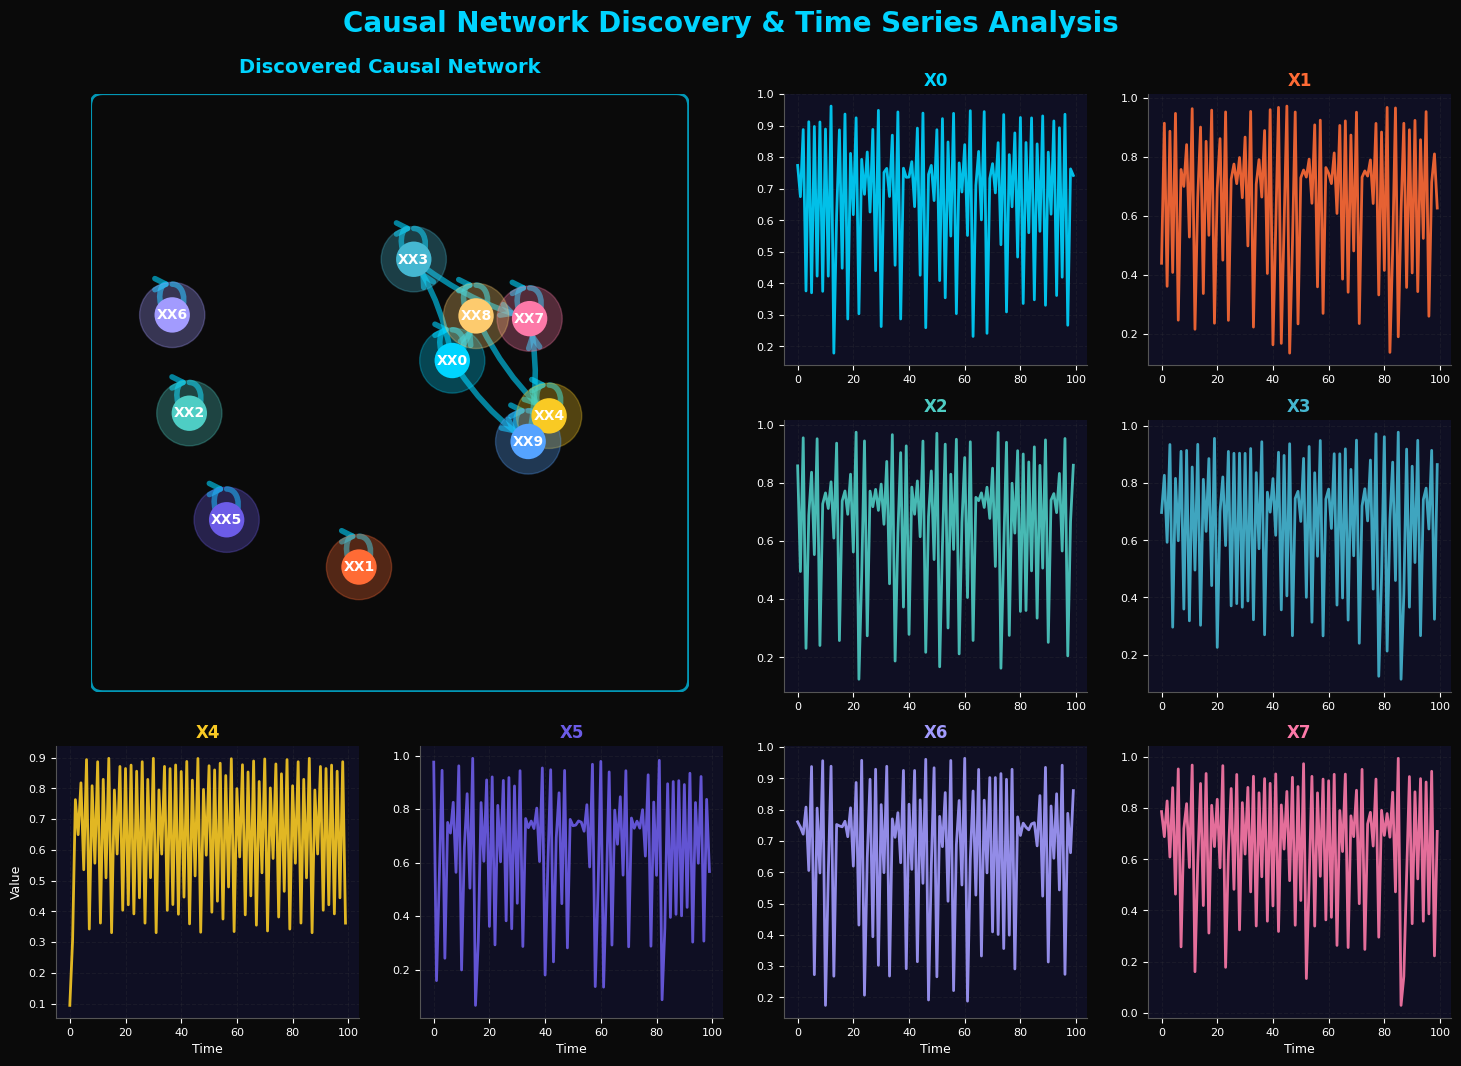

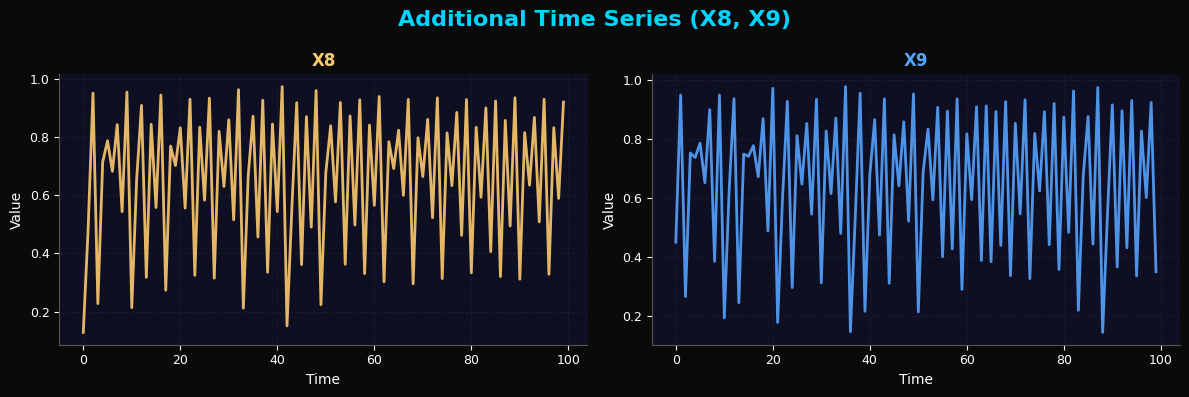

In [7]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
from matplotlib.patches import FancyBboxPatch

# Set style for beautiful plots
plt.style.use('dark_background')

def create_causal_network_plot(data, G, figsize=(18, 12)):
    """
    Create a visualization with network graph and individual time series subplots
    
    Parameters:
    data: numpy array of shape (100, 10) - your time series data
    G: networkx graph - your discovered causal network
    figsize: tuple - figure size
    """
    
    # Create figure with subplots
    fig, axes = plt.subplots(3, 4, figsize=figsize, facecolor='#0a0a0a')
    fig.suptitle('Causal Network Discovery & Time Series Analysis', 
                fontsize=20, fontweight='bold', color='#00d4ff', y=0.95)
    
    # Define colors
    node_colors = ['#00d4ff', '#ff6b35', '#4ecdc4', '#45b7d1', '#f9ca24',
                   '#6c5ce7', '#a29bfe', '#fd79a8', '#fdcb6e', '#55a3ff']
    
    # ============ NETWORK PLOT (top-left, spanning 2x2) ============
    # Remove individual subplot axes and create a larger one
    for i in range(2):
        for j in range(2):
            axes[i, j].remove()
    
    ax_network = fig.add_subplot(3, 4, (1, 6))  # Spans positions 1,2,5,6
    ax_network.set_facecolor('#0f0f23')
    
    # Add fancy border
    fancy_box = FancyBboxPatch((0.02, 0.02), 0.96, 0.96, boxstyle="round,pad=0.02",
                               facecolor='none', edgecolor='#00d4ff', linewidth=2,
                               alpha=0.7, transform=ax_network.transAxes)
    ax_network.add_patch(fancy_box)
    
    # Network layout
    pos = None
    if len(G.nodes()) > 0:
        pos = nx.spring_layout(G, k=1, iterations=50, scale=0.8)
    else:
        # Create dummy positions if no edges
        pos = {i: (np.cos(2*np.pi*i/10), np.sin(2*np.pi*i/10)) for i in range(10)}
    
    # Draw edges
    if G.edges():
        edge_weights = []
        for edge in G.edges():
            weight = G[edge[0]][edge[1]].get('weight', 0.5)
            edge_weights.append(weight * 6 + 1)
        
        nx.draw_networkx_edges(G, pos, ax=ax_network,
                              edge_color='#00d4ff', width=edge_weights,
                              alpha=0.6, arrows=True, arrowsize=20,
                              arrowstyle='->', connectionstyle='arc3,rad=0.1')
    
    # Draw nodes
    for i, (node, (x, y)) in enumerate(pos.items()):
        # Glow effect
        circle_glow = plt.Circle((x, y), 0.12, color=node_colors[i % len(node_colors)], 
                                alpha=0.3, zorder=1)
        ax_network.add_patch(circle_glow)
        
        # Main node
        circle = plt.Circle((x, y), 0.06, color=node_colors[i % len(node_colors)], 
                           edgecolor='white', linewidth=2, zorder=2)
        ax_network.add_patch(circle)
        
        # Label
        ax_network.text(x, y, f'X{node}', ha='center', va='center', 
                       fontsize=10, fontweight='bold', color='white', zorder=3)
    
    ax_network.set_xlim(-1.1, 1.1)
    ax_network.set_ylim(-1.1, 1.1)
    ax_network.set_aspect('equal')
    ax_network.axis('off')
    ax_network.set_title('Discovered Causal Network', fontsize=14, fontweight='bold',
                        color='#00d4ff', pad=15)
    
    # ============ TIME SERIES SUBPLOTS ============
    # Create individual subplots for each time series
    time_steps = np.arange(data.shape[0])
    
    # Positions for time series plots (remaining 8 subplots)
    ts_positions = [(0, 2), (0, 3), (1, 2), (1, 3), (2, 0), (2, 1), (2, 2), (2, 3)]
    
    for i in range(min(8, data.shape[1])):  # Show first 8 time series
        row, col = ts_positions[i]
        ax = axes[row, col]
        ax.set_facecolor('#0f0f23')
        
        # Plot the time series
        ax.plot(time_steps, data[:, i], color=node_colors[i], linewidth=2, alpha=0.9)
        
        # Styling
        ax.set_title(f'X{i}', fontsize=12, fontweight='bold', color=node_colors[i])
        ax.grid(True, alpha=0.2, color='#444444', linestyle='--')
        ax.spines['bottom'].set_color('#555555')
        ax.spines['left'].set_color('#555555')
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(colors='white', labelsize=8)
        
        # Only show x-label on bottom row
        if row == 2:
            ax.set_xlabel('Time', fontsize=9, color='white')
        
        # Only show y-label on leftmost column
        if col == 0:
            ax.set_ylabel('Value', fontsize=9, color='white')
    
    # Handle remaining time series if more than 8
    if data.shape[1] > 8:
        # Create a separate figure for the remaining time series
        fig2, axes2 = plt.subplots(1, 2, figsize=(12, 4), facecolor='#0a0a0a')
        fig2.suptitle('Additional Time Series (X8, X9)', fontsize=16, 
                     fontweight='bold', color='#00d4ff')
        
        for i in range(8, data.shape[1]):
            ax = axes2[i-8]
            ax.set_facecolor('#0f0f23')
            ax.plot(time_steps, data[:, i], color=node_colors[i], linewidth=2, alpha=0.9)
            
            ax.set_title(f'X{i}', fontsize=12, fontweight='bold', color=node_colors[i])
            ax.set_xlabel('Time', fontsize=10, color='white')
            ax.set_ylabel('Value', fontsize=10, color='white')
            ax.grid(True, alpha=0.2, color='#444444', linestyle='--')
            ax.spines['bottom'].set_color('#555555')
            ax.spines['left'].set_color('#555555')
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.tick_params(colors='white', labelsize=9)
        
        plt.tight_layout()
    
    plt.tight_layout()
    return fig

# Usage with your data:
fig = create_causal_network_plot(data, G)
plt.show()

# Optional: Save the plot
# plt.savefig('causal_network_analysis.png', dpi=300, bbox_inches='tight', 
#             facecolor='#0a0a0a', edgecolor='none')

In [4]:
G = discover_network(data)

Estimating edges for node number:  0
Estimating edges for node number:  1
Estimating edges for node number:  2
Estimating edges for node number:  3
Estimating edges for node number:  4
Estimating edges for node number:  5
Estimating edges for node number:  6
Estimating edges for node number:  7
Estimating edges for node number:  8
Estimating edges for node number:  9
Estimating edges for node number:  10
Estimating edges for node number:  11
Estimating edges for node number:  12
Estimating edges for node number:  13
Estimating edges for node number:  14
Estimating edges for node number:  15
Estimating edges for node number:  16
Estimating edges for node number:  17
Estimating edges for node number:  18
Estimating edges for node number:  19


In [8]:
G.edges(data=True)

OutEdgeDataView([('X0', 'X0', {'lag': 1}), ('X0', 'X3', {'lag': 1}), ('X0', 'X8', {'lag': 1}), ('X0', 'X9', {'lag': 1}), ('X1', 'X1', {'lag': 1}), ('X2', 'X2', {'lag': 1}), ('X3', 'X3', {'lag': 1}), ('X3', 'X7', {'lag': 1}), ('X4', 'X4', {'lag': 1}), ('X5', 'X5', {'lag': 1}), ('X6', 'X6', {'lag': 1}), ('X7', 'X7', {'lag': 1}), ('X8', 'X4', {'lag': 1}), ('X8', 'X8', {'lag': 1}), ('X9', 'X7', {'lag': 1}), ('X9', 'X9', {'lag': 1})])

In [5]:
import sys
!{sys.executable} -m pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
